In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyrex
import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os

In [2]:
vpol = ara.VpolAntenna("VPol", (0, 0, -200), 0)
vpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

hpol = ara.HpolAntenna("HPol", (0, 0, -200), 0)
hpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

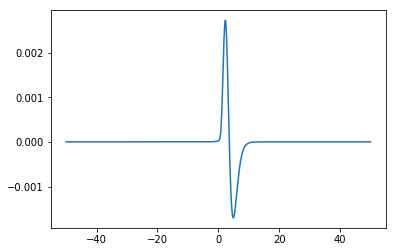

In [15]:
p = pyrex.Particle("nu_e", (0, 0, -1000), (0, 0, 1), 1e9)
p.interaction.em_frac = 0
p.interaction.had_frac = 1
signal_in = pyrex.AskaryanSignal(times=np.linspace(-50e-9, 50e-9, 2001), particle=p, viewing_angle=np.radians(60), viewing_distance=1000)
plt.plot(signal_in.times*1e9, signal_in.values)
plt.show()

# Check Antenna Response Functions

In [20]:
_, direction_theta, direction_phi = vpol.antenna._convert_to_antenna_coordinates(vpol.position - normalize(direction))
print(np.degrees(direction_theta))
print(np.degrees(direction_phi))

NameError: name 'direction' is not defined

In [21]:
freq = np.array([200e6])
thetas = np.linspace(0, 180, 91)
phi = direction_phi
vpol_resp = [vpol.antenna.directional_response(theta, phi, polarization)(freq)*vpol.antenna.frequency_response(freq) for theta in np.radians(thetas)]
hpol_resp = [hpol.antenna.directional_response(theta, phi, polarization)(freq)*hpol.antenna.frequency_response(freq) for theta in np.radians(thetas)]

plt.plot(thetas, np.abs(vpol_resp), label=vpol.name)
plt.plot(thetas, np.abs(hpol_resp), label=hpol.name)
plt.axvline(np.degrees(direction_theta), c='r', ls='--', alpha=0.5)
plt.xlim(0, 180)
plt.legend()
plt.xlabel("Theta [deg]")
plt.ylabel("Effective Height [m]")
plt.title(f"Antenna Responses at f=200 MHz, $\\phi$={int(round(np.degrees(phi)))} deg")
plt.show()

plt.plot(thetas, np.abs(vpol_resp), label=vpol.name)
plt.plot(thetas, np.abs(hpol_resp), label=hpol.name)
plt.axvline(np.degrees(direction_theta), c='r', ls='--', alpha=0.5)
plt.xlim(np.degrees(direction_theta)-5, np.degrees(direction_theta)+5)
plt.ylim(0, 0.02)
plt.legend()
plt.xlabel("Theta [deg]")
plt.ylabel("Effective Height [m]")
plt.title(f"Antenna Responses at f=200 MHz, $\\phi$={int(round(np.degrees(phi)))} deg")
plt.show()

NameError: name 'direction_phi' is not defined

In [39]:
freq = np.array([200e6])
# phi = np.radians(90)
phis = np.linspace(0, 360, 91)
# vpol_pol = (0, 0, 1)
# hpol_pol = (np.cos(phi),np.sin(phi) , 0)
vpol_resp = [vpol.antenna.directional_response(direction_theta, phi, vpol_pol)(freq)*vpol.antenna.frequency_response(freq) for phi in np.radians(phis)]
hpol_resp = [hpol.antenna.directional_response(direction_theta, phi, hpol_pol)(freq)*hpol.antenna.frequency_response(freq) for phi in np.radians(phis)]

plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# plt.axvline(np.degrees(phi), c='r', ls='--', alpha=0.5)
plt.xlim(0, 360)
plt.legend(loc="upper right")
plt.xlabel("Phi [deg]")
plt.ylabel("Effective Height [m]")
# plt.title(f"Antenna Response, $\\theta$={int(round(180-np.degrees(theta)))} deg")
# plt.show()

# plt.plot(phis, np.abs(vpol_resp), label=vpol.name)
# plt.plot(phis, np.abs(hpol_resp), label=hpol.name)
# plt.axvline(np.degrees(direction_phi), c='r', ls='--', alpha=0.5)
# plt.xlim(np.degrees(direction_phi)-5, np.degrees(direction_phi)+5)
# plt.ylim(0, 0.02)
# plt.legend()
# plt.xlabel("Phi [deg]")
# plt.ylabel("Effective Height [m]")
# plt.title(f"Antenna Responses at f=200 MHz, $\\theta$={int(round(np.degrees(theta)))} deg")
# plt.show()
# plt.savefig("./plots/Antennas/Antenna_response.png", dpi=200)

NameError: name 'direction_theta' is not defined

In [19]:
np.degrees(theta)

NameError: name 'theta' is not defined

In [59]:
ARASIM_VPOL_DATA_FILE = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_bicone6in_output.txt")
ARASIM_HPOL_DATA_FILE = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_dipoletest1_output.txt")
# Vpol data file contains only the theta responses
ARASIM_VPOL_THETA_RESPONSE_DATA = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_VPOL_DATA_FILE)
ARASIM_VPOL_RESPONSE_DATA = (
    ARASIM_VPOL_THETA_RESPONSE_DATA[0],
    np.zeros(ARASIM_VPOL_THETA_RESPONSE_DATA[0].shape),
    *ARASIM_VPOL_THETA_RESPONSE_DATA[1:]
)
# Hpol data file contains only the phi responses
ARASIM_HPOL_PHI_RESPONSE_DATA = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_HPOL_DATA_FILE)
ARASIM_HPOL_RESPONSE_DATA = (
    np.zeros(ARASIM_HPOL_PHI_RESPONSE_DATA[0].shape),
    *ARASIM_HPOL_PHI_RESPONSE_DATA
)

In [35]:
class AraSimHpol(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_HPOL_RESPONSE_DATA,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)
class AraSimVpol(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_VPOL_RESPONSE_DATA,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)

In [36]:
vpolARA = AraSimVpol("VPol", (0, 0, -200), 0)
hpolARA = AraSimHpol("HPol", (0, 0, -200), 0)


In [40]:
freq = np.array([200e6])
phi = np.radians(90)
# phis = np.linspace(0, 360, 91)
vpol_pol = (0, 0, 1)
hpol_pol = (0,1 , 0)
# vpol_resp = [vpolARA.antenna.directional_response(direction_theta, phi, vpol_pol)(freq)*vpolARA.antenna.frequency_response(freq) for phi in np.radians(phis)]
# hpol_resp = [hpolARA.antenna.directional_response(direction_theta, phi, hpol_pol)(freq)*hpolARA.antenna.frequency_response(freq) for phi in np.radians(phis)]

# plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
# plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
# plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# # plt.axvline(np.degrees(phi), c='r', ls='--', alpha=0.5)
# plt.xlim(0, 360)
# plt.legend(loc="upper right")
# plt.xlabel("Phi [deg]")
# plt.ylabel("Effective Height [m]")
# # plt.title(f"Antenna Response, $\\theta$={int(round(180-np.degrees(theta)))} deg")

In [74]:
ARASIM_VPOL_DATA_FILE_UP = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_bicone6in_output_updated2016.txt")
ARASIM_HPOL_DATA_FILE_UP = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_dipoletest1_output_updated2016.txt")
# Vpol data file contains only the theta responses
ARASIM_VPOL_THETA_RESPONSE_DATA_UP = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_VPOL_DATA_FILE_UP)
ARASIM_VPOL_RESPONSE_DATA_UP = (
    ARASIM_VPOL_THETA_RESPONSE_DATA_UP[0],
    np.zeros(ARASIM_VPOL_THETA_RESPONSE_DATA_UP[0].shape),
    *ARASIM_VPOL_THETA_RESPONSE_DATA_UP[1:]
)
# Hpol data file contains only the phi responses
ARASIM_HPOL_PHI_RESPONSE_DATA_UP = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_HPOL_DATA_FILE_UP)
ARASIM_HPOL_RESPONSE_DATA_UP = (
    np.zeros(ARASIM_HPOL_PHI_RESPONSE_DATA_UP[0].shape),
    *ARASIM_HPOL_PHI_RESPONSE_DATA_UP
)

In [75]:
class AraSimHpol_UP(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_HPOL_RESPONSE_DATA_UP,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)
class AraSimVpol_UP(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_VPOL_RESPONSE_DATA_UP,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)

In [76]:
vpolARA_UP = AraSimVpol_UP("VPol", (0, 0, -200), 0)
hpolARA_UP = AraSimHpol_UP("HPol", (0, 0, -200), 0)

In [77]:
freqs = np.linspace(0,1,100)
freq_resp = vpolARA.antenna.frequency_response(freqs*1E9)*vpolARA.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)
freq_resp_Ch = vpol.antenna.frequency_response(freqs*1E9)*vpol.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)
freq_resp_UP = vpolARA_UP.antenna.frequency_response(freqs*1E9)*vpolARA_UP.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)

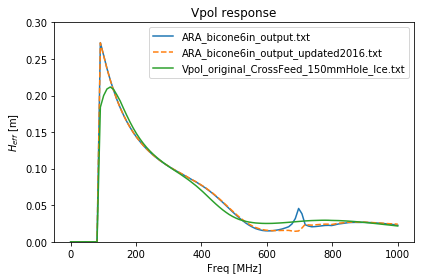

In [78]:
plt.plot(freqs*1000, abs(freq_resp), label = "ARA_bicone6in_output.txt")
plt.plot(freqs*1000, abs(freq_resp_UP), "--",label = "ARA_bicone6in_output_updated2016.txt")
plt.plot(freqs*1000, abs(freq_resp_Ch), label = "Vpol_original_CrossFeed_150mmHole_Ice.txt")
plt.ylim(0,0.3)
plt.ylabel("$H_{eff}$ [m]")
plt.xlabel("Freq [MHz]")
plt.title("Vpol response")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/Antennas/Vpol_comparison.png", dpi=200)


In [79]:
freq_resp_H = hpolARA.antenna.frequency_response(freqs*1E9)*hpolARA.antenna.directional_response(np.pi/2, 0, hpol_pol)(freqs*1E9)
freq_resp_Ch_H = hpol.antenna.frequency_response(freqs*1E9)*hpol.antenna.directional_response(np.pi/2, 0, hpol_pol)(freqs*1E9)
freq_resp_UP = hpolARA_UP.antenna.frequency_response(freqs*1E9)*hpolARA_UP.antenna.directional_response(np.pi/2, 0, hpol_pol)(freqs*1E9)

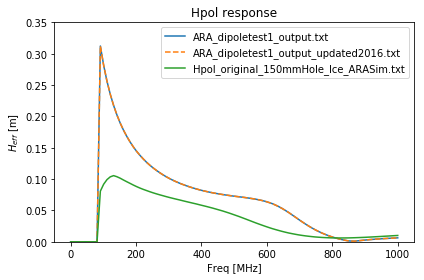

In [81]:
plt.plot(freqs*1000, abs(freq_resp_H), label = "ARA_dipoletest1_output.txt")
plt.plot(freqs*1000, abs(freq_resp_UP), "--",label = "ARA_dipoletest1_output_updated2016.txt")
plt.plot(freqs*1000, abs(freq_resp_Ch_H), label = "Hpol_original_150mmHole_Ice_ARASim.txt")
plt.ylim(0,0.35)
plt.ylabel("$H_{eff}$ [m]")
plt.xlabel("Freq [MHz]")
plt.title("Hpol response")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/Antennas/Hpol_comparison.png", dpi=200)
